# STOR 320 Intro to Data Science - CART

This lecture is comprised of two main sections:

- 1. Classification Trees

- 2. Regression Trees

The lecture we will dive deeper into the `sklearn` package to make use of algorithms such as Classification Trees (`DecisionTreeClassifier`) and Regression Trees (`DecisionTreeRegressor`).

### Side note: How to hide the python code and cell index in jupyter notebook?

In [6]:
# show
from IPython.display import HTML

HTML('''
<script>
$(document).ready(function() {
    // Show input code cells
    $('div.input').show(); 
    
    // Show output prompts ("In []" and "Out []")
    $('.prompt').show();
});
</script>
''')


In [7]:
# hide
from IPython.display import HTML

HTML('''
<script>
$(document).ready(function() {
    // Hide input code cells
    $('div.input').hide(); 
    
    // Hide output prompts ("Out []")
    $('.prompt').hide();
});
</script>
''')


In [8]:
# show
from IPython.display import HTML

HTML('''
<script>
$(document).ready(function() {
    // Show input code cells
    $('div.input').show(); 
    
    // Show output prompts ("In []" and "Out []")
    $('.prompt').show();
});
</script>
''')


### Load the Data

In [9]:
import numpy as np
import pandas as pd

In [10]:
parole = pd.read_csv("NYCparole.csv")
parole.info()
parole.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6102 entries, 0 to 6101
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Violator    6102 non-null   int64  
 1   Male        6102 non-null   int64  
 2   Age         6102 non-null   float64
 3   TimeServed  6102 non-null   float64
 4   Class       6102 non-null   object 
 5   Multiple    6102 non-null   int64  
 6   InCity      6102 non-null   int64  
dtypes: float64(2), int64(4), object(1)
memory usage: 333.8+ KB


,Violator,Male,Age,TimeServed,Class,Multiple,InCity
0,0,1,49.4,3.15,D,0,1
1,1,1,26.0,5.95,D,1,0
2,0,1,24.9,2.25,D,1,0
3,0,1,52.1,29.22,A,0,0
4,0,1,35.9,12.78,A,1,1


## 1. CLASSIFICATION TREES

Is CART an appropriate model for classification with Parole data? 

https://datascience.stackexchange.com/questions/6048/decision-tree-or-logistic-regression

### Casting the response variable as Integer

In [11]:
parole['Violator'] = parole['Violator'].astype('int64')

### Dummy Encoding

In previous labs with `statsmodels`, we left the handling of categorical variables to the model.
With `sklearn` packages, we need to do the categorical encoding ourselves.


Two widely used types of categorical encoding are "Dummy Encoding" and "One-hot encoding":
- One-hot encoding converts a variable that has n possible distinct values, into n-1 binary variables. 
- Dummy encoding converts a variable with n possible distinct values, into n binary variables.  

For regression-type problems One-hot Encoding is preferable as we wish to avoid perfect collinearity between the binary variables that are being generated by the encoding. In the classification problem however, we are not concerned about inflating factors and hence can choose either of the two schemes. They will produce equivalent encodings.

We will apply the encoding scheme to the `Class` variable.

In [12]:
parole_enc = pd.get_dummies(parole, columns = ['Class'])

`pd.get_dummies()` can also automatically detect the categorical columns if no specific columns are given

In [13]:
parole_enc.info()
parole_enc.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6102 entries, 0 to 6101
Data columns (total 11 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Violator    6102 non-null   int64  
 1   Male        6102 non-null   int64  
 2   Age         6102 non-null   float64
 3   TimeServed  6102 non-null   float64
 4   Multiple    6102 non-null   int64  
 5   InCity      6102 non-null   int64  
 6   Class_A     6102 non-null   bool   
 7   Class_B     6102 non-null   bool   
 8   Class_C     6102 non-null   bool   
 9   Class_D     6102 non-null   bool   
 10  Class_E     6102 non-null   bool   
dtypes: bool(5), float64(2), int64(4)
memory usage: 316.0 KB


,Violator,Male,Age,TimeServed,Multiple,InCity,Class_A,Class_B,Class_C,Class_D,Class_E
0,0,1,49.4,3.15,0,1,False,False,False,True,False
1,1,1,26.0,5.95,1,0,False,False,False,True,False
2,0,1,24.9,2.25,1,0,False,False,False,True,False
3,0,1,52.1,29.22,0,0,True,False,False,False,False
4,0,1,35.9,12.78,1,1,True,False,False,False,False


### Splitting the Data

In [14]:
from sklearn.model_selection import train_test_split

y = parole_enc['Violator']
X = parole_enc.drop(['Violator'], axis=1)

X_train, X_test, y_train, y_test = train_test_split(X, y, 
                                                    test_size=0.3,  
                                                    stratify=parole_enc['Violator'],
                                                    random_state=88,)
X_train.shape, X_test.shape

((4271, 10), (1831, 10))

In [15]:
# BASELINE

negative = np.sum(y_train == 0)
positive = np.sum(y_train == 1)
print(pd.Series({'0': negative, '1': positive}))

0    4037
1     234
dtype: int64


### Decision Tree Classifier

`skelarn`'s `DecisionTreeClassifier` is just one of many implementations that we can use for our classification problem

In [16]:
from sklearn.tree import DecisionTreeClassifier

dtc = DecisionTreeClassifier(min_samples_leaf=5, 
                             ccp_alpha=0.001,
                             random_state = 88)

dtc = dtc.fit(X_train, y_train)

Node count = 17


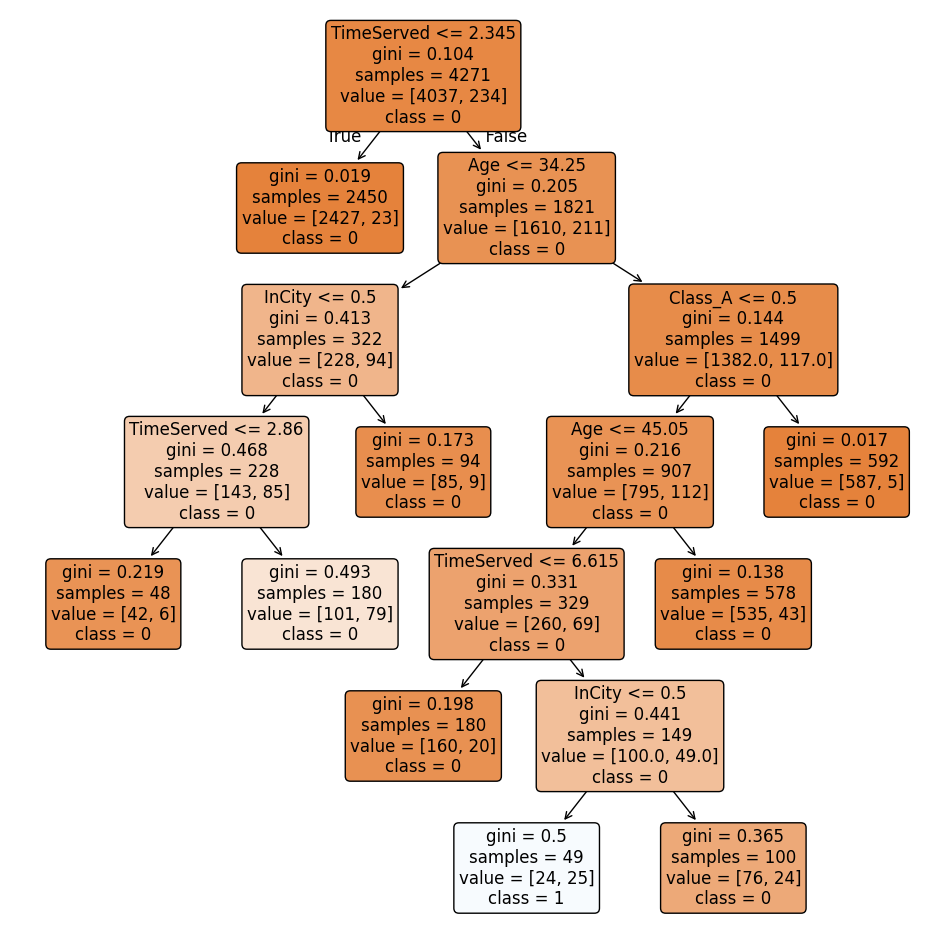

In [17]:
import matplotlib.pyplot as plt
from sklearn.tree import plot_tree

print('Node count =', dtc.tree_.node_count)
plt.figure(figsize=(12,12))
plot_tree(dtc, 
          feature_names=X_train.columns.tolist(), 
          class_names=['0','1'], 
          filled=True,
          impurity=True,
          rounded=True,
          fontsize=12) 
plt.show()

### Pruning

Node count = 5


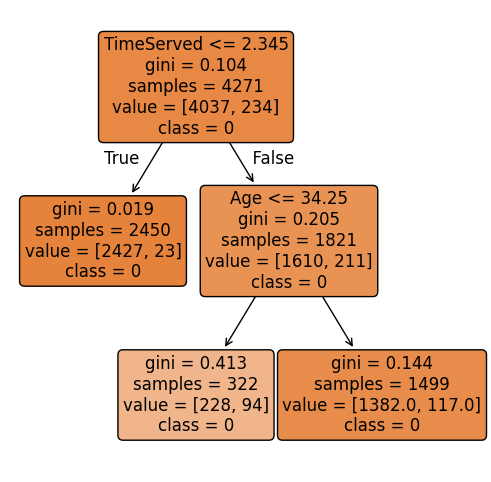

In [18]:
# Try increasing the complexity parameter to prune the tree

dtc2 = DecisionTreeClassifier(min_samples_leaf=5, 
                              ccp_alpha=0.005,
                              random_state = 88)

dtc2 = dtc2.fit(X_train, y_train)

print('Node count =', dtc2.tree_.node_count)
plt.figure(figsize=(6,6))
plot_tree(dtc2, 
          feature_names=X_train.columns.tolist(), 
          class_names=['0','1'], 
          filled=True,
          impurity=True,
          rounded=True,
          fontsize=12)  
plt.show() 

In [19]:
# MAKE PREDICTIONS 
from sklearn.metrics import confusion_matrix
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score

y_pred = dtc2.predict(X_test)
cm = confusion_matrix(y_test, y_pred)

print ("Confusion Matrix : \n", cm)
print('Precision:',precision_score(y_test, y_pred))
print('Recall:',recall_score(y_test, y_pred))

Confusion Matrix : 
 [[1730    0]
 [ 101    0]]
Precision: 0.0
Recall: 0.0


/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


We can observe that our tree is not able to discern very well between positive cases of `Violator` and negative cases of `Violator`. The highly imbalanced dataset is likely to be one of the reasons why our predictions are heavily tilted towards `Violator = 0`. We will address the class imbalance with the help of a custom loss function. More specifically, we will assign individual weights to each of the classes. 

### Custom Losses and Weights

Ideally we would like to produce a loss function that can reflect specific penalties for the various types of classification choices.

- cost_TP = 0
- cost_TN = 0
- cost_FP = 1
- cost_FN = 20

With the `sklearn`'s implementation of `DecisionTreeClassifier`, we are not able to incorporate directly such a function. However, we can achieve the same result by assigning weights to the classes in a way that it mimics the presence of more observations of the minority class. This will accomplish the goal of rebalancing our model.

Node count = 11


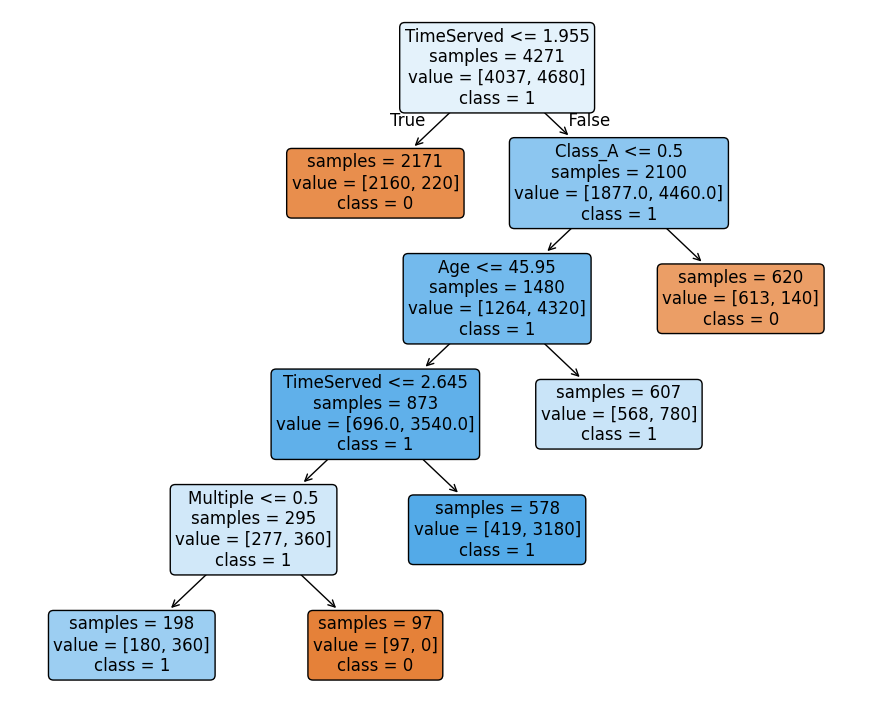

Confusion Matrix : 
 [[1239  491]
 [   7   94]]
Precision: 0.1606837606837607
Recall: 0.9306930693069307


In [20]:
dtc3 = DecisionTreeClassifier(min_samples_leaf=5, 
                              ccp_alpha=0.007,
                              class_weight = {0: 1, 1: 20},
                              random_state = 88)

dtc3 = dtc3.fit(X_train, y_train)

print('Node count =', dtc3.tree_.node_count)
plt.figure(figsize=(11,9))
plot_tree(dtc3, 
          feature_names=X_train.columns.tolist(), 
          class_names=['0','1'], 
          filled=True,
          impurity=False,
          rounded=True,
          fontsize=12) 
plt.show()

y_pred = dtc3.predict(X_test)
cm = confusion_matrix(y_test, y_pred)

print ("Confusion Matrix : \n", cm) 
print('Precision:',precision_score(y_test, y_pred))
print('Recall:',recall_score(y_test, y_pred))

## 2. REGRESSION TREES

For the Regression Tree example, we use our old wine dataset:

In [22]:
wine = pd.read_csv("wine_agg.csv")
wine.head()
len(wine)

46

In [23]:
wine_train = wine[wine['Year'] <= 1985]
wine_test = wine[wine['Year'] > 1985]

y_train = wine_train['LogAuctionIndex']
X_train = wine_train.drop(['LogAuctionIndex'], axis=1)
X_train.shape

(31, 8)

### Decision Tree Regressor

In [24]:
from sklearn.tree import DecisionTreeRegressor

dtr = DecisionTreeRegressor(min_samples_split=10, 
                            ccp_alpha=0.02,
                            random_state = 88)
dtr = dtr.fit(X_train, y_train)

Node count = 9


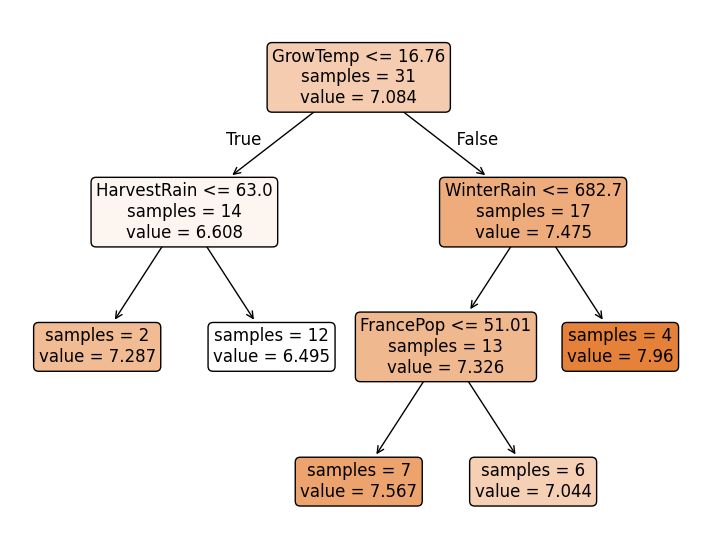

In [25]:
print('Node count =', dtr.tree_.node_count)
plt.figure(figsize=(9,7))
plot_tree(dtr, 
          feature_names=X_train.columns.tolist(), 
          class_names=['0','1'], 
          filled=True,
          impurity=False,
          rounded=True,
          fontsize=12)
plt.show()

In [26]:
def OSR2(model, X_test, y_test, y_train):
    
    y_pred = model.predict(X_test)
    SSE = np.sum((y_test - y_pred)**2)
    SST = np.sum((y_test - np.mean(y_train))**2)
                 
    return (1 - SSE/SST)

In [27]:
y_test = wine_test['LogAuctionIndex']
X_test = wine_test.drop(['LogAuctionIndex'], axis=1)

print('OSR2:', OSR2(dtr, X_test, y_test, y_train))

OSR2: -0.171331426511258


A negative OSR2 is an indicator that the model doesn't work well on the test set. 